In [38]:
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt 
import altair as alt


# Analisis Exploratorio sobre accidentalidad en Buenos Aires

En este informe analizaremos la accidentalidad de Buenos aires, argentina, para esto analizaremos una base de datos con información sobre 696 accidentes ocurridos en La Ciudad Autónoma de Buenos Aires (CABA), de los cuales se cuenta con 717 victimas fatales en estos accidentes.  

CABA cuenta con  una población aproximada de  $3 120 612$, dividida en $15$ comunas, de la cuales cada comuna tiene entre $1$ a $5$ barrios cada una. Ademas las vias se dividen en **'AVENIDA'**, **'GRAL PAZ'**, **'CALLE'** y  **'AUTOPISTA'**

- En la mayoria de los casos tenemos información sobre la edad, sexo y fecha de fallecimiento de la victima y fecha del accidente.

- El objetivo es brindar información oportuna y significativa que servirá para reduccir la accidentalidad.

## Carga de data

In [39]:
path_hechos = os.path.join('..','data','clear','hechos_homicidios.csv')
path_victimas = os.path.join('..','data','clear','victimas_homicidios.csv')

In [40]:
hechos = pd.read_csv(path_hechos)
victimas = pd.read_csv(path_victimas)

In [41]:
hechos.head(5)

,id_hechos,n_victimas,fecha,anho,mes,dia,hora,franja_horaria,lugar_del_hecho,tipo_de_calle,calle,direccion_normalizada,comuna,longitud,latitud,participantes,victimas,acusado,Cruce_boolean
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4.0,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,True
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1.0,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.","PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,True
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7.0,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,ENTRE RIOS AV. 2034,1,-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,False
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0.0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,-58.465039,-34.680930,MOTO-SD,MOTO,SD,True
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5.0,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,True


In [42]:
victimas.head(5)

,id_hechos,fecha,anho,mes,dia,rol,victimas,sexo,edad,fecha_fallecimiento,misma_fecha_accidente,rango_etario,semestre
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19.0,2016-01-01,True,joven,1
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70.0,2016-01-02,True,adulto_mayor,1
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30.0,2016-01-03,True,adulto,1
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18.0,2016-01-10,True,joven,1
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29.0,2016-02-01,False,joven,1


In [43]:
data = hechos.merge(victimas,on='id_hechos')

data.columns

Index(['id_hechos', 'n_victimas', 'fecha_x', 'anho_x', 'mes_x', 'dia_x',
       'hora', 'franja_horaria', 'lugar_del_hecho', 'tipo_de_calle', 'calle',
       'direccion_normalizada', 'comuna', 'longitud', 'latitud',
       'participantes', 'victimas_x', 'acusado', 'Cruce_boolean', 'fecha_y',
       'anho_y', 'mes_y', 'dia_y', 'rol', 'victimas_y', 'sexo', 'edad',
       'fecha_fallecimiento', 'misma_fecha_accidente', 'rango_etario',
       'semestre'],
      dtype='object')

In [44]:
columnas = ['id_hechos', 'n_victimas', 'fecha_x', 'anho_x', 'mes_x', 'dia_x',
       'hora', 'franja_horaria', 'lugar_del_hecho', 'tipo_de_calle', 'calle',
       'direccion_normalizada', 'comuna', 'longitud', 'latitud',
       'participantes', 'victimas_x', 'acusado', 'Cruce_boolean', 'rol', 'sexo', 'edad',
       'fecha_fallecimiento', 'misma_fecha_accidente', 'rango_etario',
       'semestre']

In [45]:
data = data[columnas]

## Cantidad de accidente en cruces por tipo de calle

Los cruces son lugares donde cualquier cosa puede pasar, si una persona se encuentra distraida, a continuación analizaremos la cantidad de de victimas que ocurrieron en un cruce. para ser mas especifico, analizaremos los accidentes que ocurren en cruces en los diferentes tipos de calle que cuenta CABA,
**Avenida**,**Autopista**, **Calle** y **Gral Paz**. buscaremos el tipo de calle donde se presentan mayor número de accidentes para poder tomar acciones oportunas ante este problema.

In [46]:
data['Cruce_boolean'].value_counts().reset_index().rename(columns={'Cruce_boolean': 'accidente en un cruce','count': 'cantidad de en cruces'})

,accidente en un cruce,cantidad de en cruces
0,True,541
1,False,176


**Nota:** Podemos observar que de las 717 victimas 541 ocurrieron en un cruce vehicular, esto equivale al $75\%$ de los accidentes ocurridos.

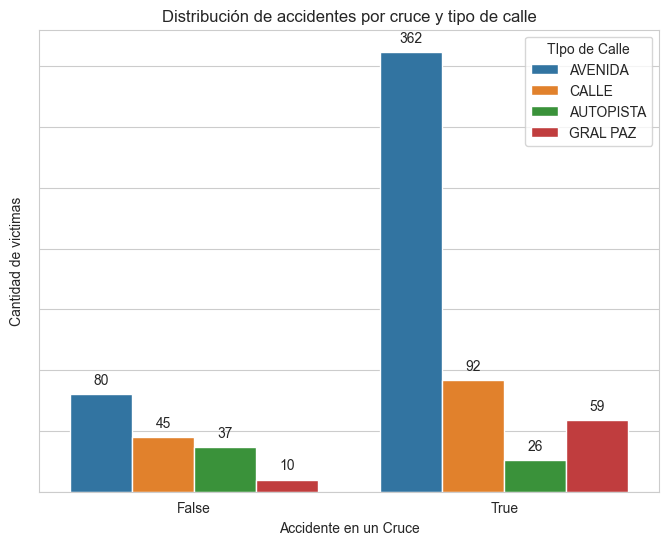

In [47]:
plt.figure(figsize=(8, 6))

mask_sin_SD = data['sexo'] != 'SD'
ax = sns.countplot(x='Cruce_boolean', data=data[mask_sin_SD] ,hue='tipo_de_calle')

for p in ax.patches:
    if p.get_height()>0:
        ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax.set_yticklabels([])
ax.legend(title ='TIpo de Calle')

plt.title('Distribución de accidentes por cruce y tipo de calle')
plt.xlabel('Accidente en un Cruce')
plt.ylabel('Cantidad de victimas')
plt.show()

**Conclusión**: Segun las graficas obtenidad el $75\%$ de los accidentes ocurrieron en cruces vehiculares, y de los $362$ ocurrieron en Avenidas, por lo que el 67% de los accidentes ocurridos en cruces son causados en avenidas, a continuación analizaremos que tipo de victimas son las que más accidentalidad tienen en este tipo de calle.

In [48]:
pd.DataFrame(data['sexo'].value_counts().reset_index().rename(columns={'count': 'cantidad de victimas'}))

,sexo,cantidad de victimas
0,MASCULINO,545
1,FEMENINO,166
2,SD,6


In [49]:
data['victimas_x'][data['tipo_de_calle'] =='AVENIDA'].value_counts().reset_index().rename(columns={'count': 'cantidad de victimas en avenidas'})

,victimas_x,cantidad de victimas en avenidas
0,PEATON,186
1,MOTO,174
2,AUTO,53
3,BICICLETA,18
4,PASAJEROS,4
5,MOVIL,3
6,SD,2
7,CARGAS,2


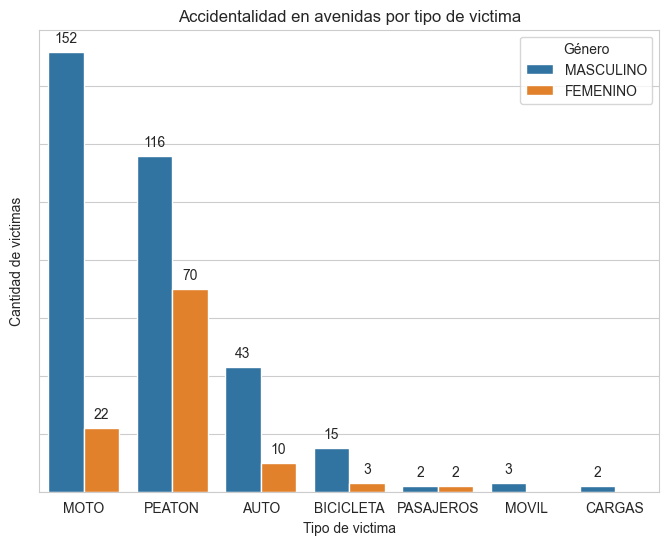

In [50]:
plt.figure(figsize=(8, 6))

mask_avenida = (data['tipo_de_calle'] =='AVENIDA') & (data['victimas_x'] !='SD')
ax = sns.countplot(x='victimas_x', data=data[mask_avenida] ,hue='sexo')

for p in ax.patches:
    if p.get_height()>0:
        ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax.set_yticklabels([])
ax.legend(title ='Género')

plt.title('Accidentalidad en avenidas por tipo de victima')
plt.xlabel('Tipo de victima')
plt.ylabel('Cantidad de victimas')
plt.show()

- **Conclusión:** 
Podemos observar que contamos con 442 accidentes ocurridos en avenidas donde las victimas mas afectadas son MOTOS y PEATONES, mas aun, los hombres en moto son los mas afectados y representan el $34\%$  y las mujeres peatones con un $16\%$ 

## Relación entre rango etario y fecha de accidente
El tiempo de reacción ante un accidente es fundamental para evitar victimas fatales, es por esto que analizaremos la cantida de victimas que pierden su vida el mismo dia del accidente, ademas realizaremos un análisis por rango etario, donde su distribución es 

$$\begin{cases}
Menor && \text{si es menor 18 años}\\
Joven && \text{si es menor 30 años y mayor de 17 años}\\
Adulto && \text{si es menor 50 años y mayor de 29 años}\\
Adulto mayor && \text{si es mayor igual que 50 años}
\end{cases}$$


In [51]:
data['rango_etario'].value_counts().reset_index().rename(columns={'count':'cantidad de victimas','rango_etario': 'rango etario'})

,rango etario,cantidad de victimas
0,adulto,286
1,adulto_mayor,210
2,joven,198
3,menor,23


A continuación analizaremos la distribución de accidentes por edad, por año. El objetivo de esta sección es encontrar patrones de acción ante accidentes de transito.

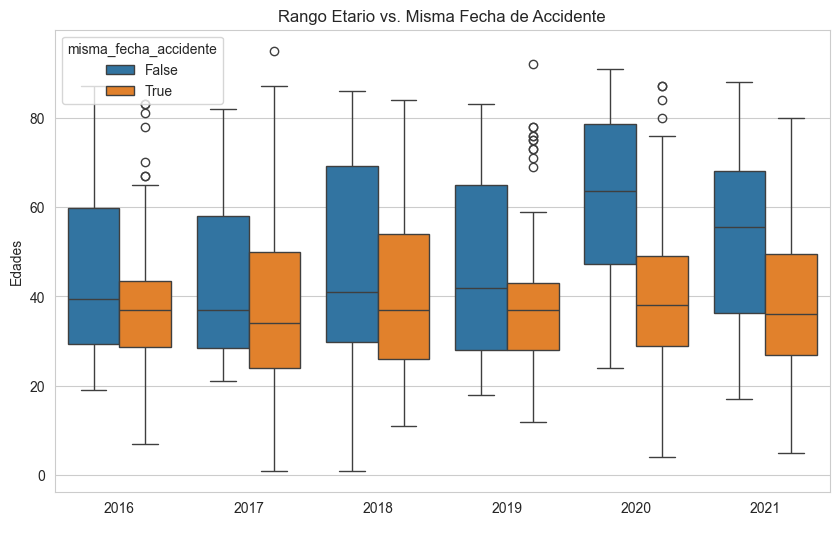

In [52]:

columnas = ['anho_x', 'misma_fecha_accidente']


# Crear el gráfico de barras
plt.figure(figsize=(10, 6))

# orden_categorias = ["menor", "joven", "adulto", "adulto_mayor"]
ax = sns.boxplot(x='anho_x',y='edad', hue='misma_fecha_accidente', data=data)

plt.title('Rango Etario vs. Misma Fecha de Accidente')
plt.xlabel(' ')
plt.ylabel('Edades')

plt.show()

**Nota** Podemos observar que la media de las edades de personas que fallecen el mismo dia del accidente se mantiene constante, pero la edad media dia de personas que fallecen un dia diferente al accidente tuvo un incremente a partir del 2020, lo que significa que a partir de este año pudo ocurrir algunos cambios en  la atención temprana ante accidentes.

Tambien observamos que en algunos años se encuentran victimas con más de 80 años, incluso niños recien nacidos.

**Nota:** Si se logra implementar acciones para la rapida asistencia de atención prehispitalaria (APH), esto con el objetivo de preparar a las personas ante un accidente, podriamos reducir la siniestralidad de personas que no logran llegar a un centro hospitalario.  



In [53]:
columnas = ['rango_etario','misma_fecha_accidente']

data[columnas].groupby(columnas).value_counts().reset_index().sort_values('count',ascending=False)

,rango_etario,misma_fecha_accidente,count
1,adulto,True,240
5,joven,True,165
3,adulto_mayor,True,141
2,adulto_mayor,False,69
0,adulto,False,46
4,joven,False,33
7,menor,True,21
6,menor,False,2


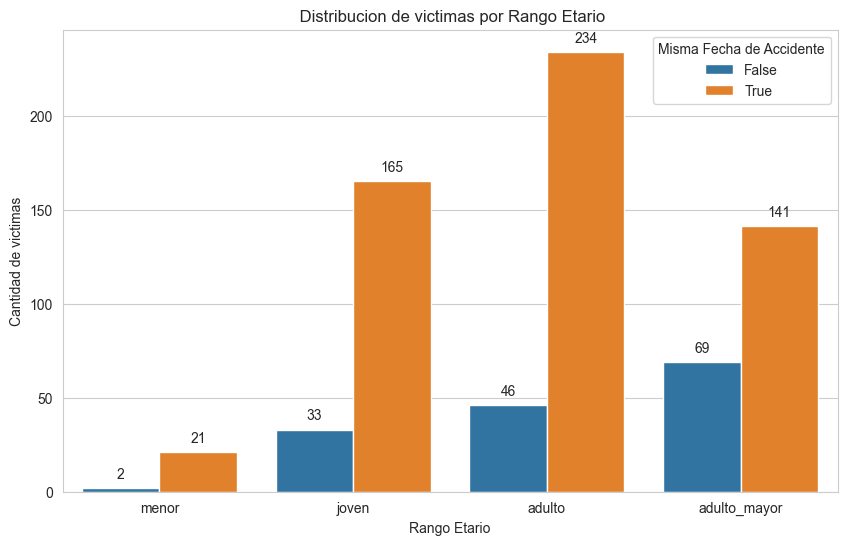

In [54]:

columnas = ['rango_etario', 'misma_fecha_accidente']
mask_sin_SD = data['sexo'] != 'SD'

plt.figure(figsize=(10, 6))

orden_categorias = ["menor", "joven", "adulto", "adulto_mayor"]
ax = sns.countplot(x='rango_etario', hue='misma_fecha_accidente', data=data[mask_sin_SD], order=orden_categorias )

for p in ax.patches:
    if p.get_height()>0:
        ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title(' Distribucion de victimas por Rango Etario')
plt.xlabel('Rango Etario')
plt.ylabel('Cantidad de victimas')
plt.legend(title='Misma Fecha de Accidente', loc='upper right')

plt.show()

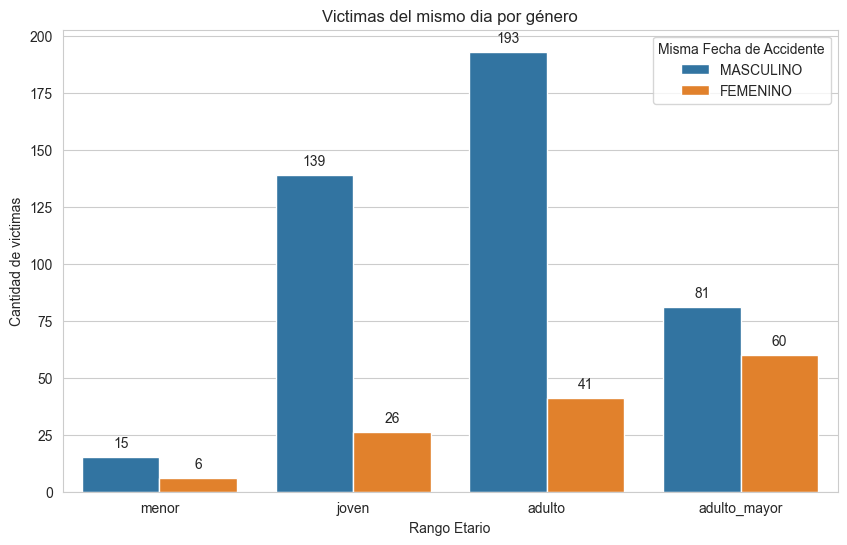

In [55]:

columnas = ['rango_etario', 'misma_fecha_accidente']

mask_misma_fecha =( data['misma_fecha_accidente'] == True) & (data['sexo'] != 'SD' )


plt.figure(figsize=(10, 6))

orden_categorias = ["menor", "joven", "adulto", "adulto_mayor"]
ax = sns.countplot(x='rango_etario', hue='sexo', data=data[mask_misma_fecha], order=orden_categorias )

for p in ax.patches:
    if p.get_height()>0:
        ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Victimas del mismo dia por género')
plt.xlabel('Rango Etario')
plt.ylabel('Cantidad de victimas')
plt.legend(title='Misma Fecha de Accidente', loc='upper right')

plt.show()

**Nota** Podemos observar que la mayoria de personas que sufren una accidente, pierden la vida el mismo dia, donde las personas entre 30 y 50 años son los que mayor cantidad de victimas se registran. A continuación analizaremos la evolución de victimas adultos, por otra parte, de las personas que perdieron la vida el mismo dia, las mujeres que tienen no menos de 30 años son las que muestran una mayor siniestralidad. 

## **Evolución de cantidad de victimas por fechas** 

El gobierno cada año realiza acciones para mejorar la calidad de vida de las personas, por esto analizaremos como ha evolucionado la cantidad de victmas año a año desde el 2016 hasta el 2021.

- **Accidentes en avenidas año a año**

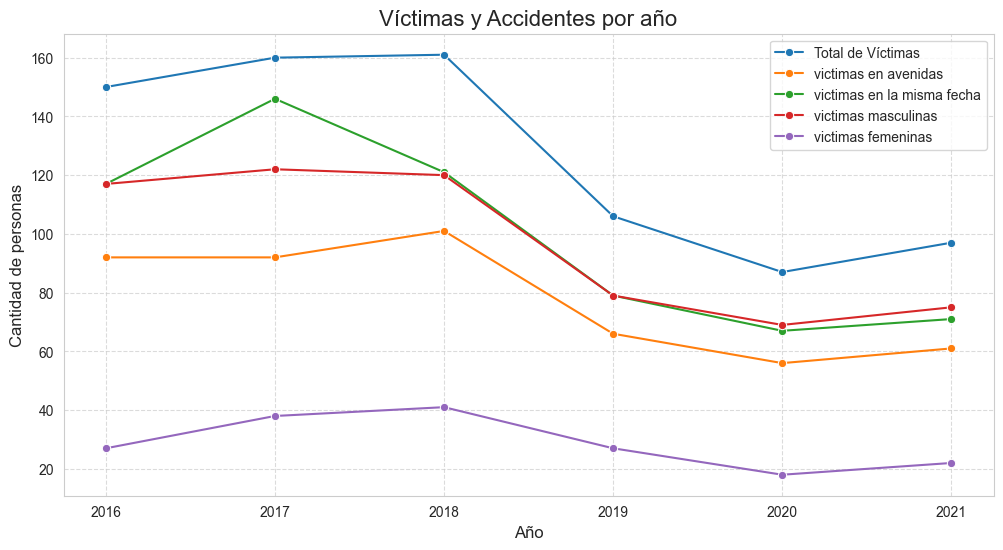

In [56]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid") 

mask_avenida = (data['tipo_de_calle'] =='AVENIDA') & (data['victimas_x'] !='SD')
mask_misma_fecha =( data['misma_fecha_accidente'] == True) & (data['sexo'] != 'SD' )
mask_masculino = data['sexo']=='MASCULINO'
mask_femenino = data['sexo']=='FEMENINO'


sns.lineplot( data[['n_victimas','anho_x']].groupby('anho_x').sum()['n_victimas'], marker='o', label='Total de Víctimas')
sns.lineplot( data[mask_avenida][['n_victimas','anho_x']].groupby('anho_x').sum()['n_victimas'], marker='o', label='victimas en avenidas')
sns.lineplot( data[mask_misma_fecha][['n_victimas','anho_x']].groupby('anho_x').sum()['n_victimas'], marker='o', label='victimas en la misma fecha')
sns.lineplot( data[mask_masculino][['n_victimas','anho_x']].groupby('anho_x').sum()['n_victimas'], marker='o', label='victimas masculinas')
sns.lineplot( data[mask_femenino][['n_victimas','anho_x']].groupby('anho_x').sum()['n_victimas'], marker='o', label='victimas femeninas')


# Personalizar el gráfico
plt.title('Víctimas y Accidentes por año', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Cantidad de personas', fontsize=12)

# Agregar leyenda y cuadrícula
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

- **Accidentes en cruces año a año**

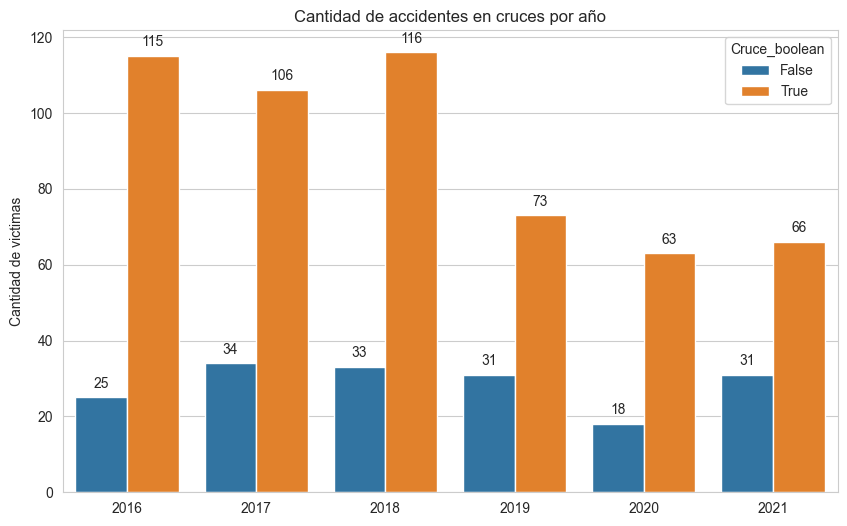

In [57]:
columnas = ['anho_x', 'Cruce_boolean']

# Crear el DataFrame con las frecuencias
mask_sin_SD = data['sexo'] != 'SD'
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))

ax = sns.countplot(x='anho_x',hue = 'Cruce_boolean', data=data[mask_sin_SD] )

for p in ax.patches:
    if p.get_height()>0:
        ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Cantidad de accidentes en cruces por año')
plt.xlabel('')
plt.ylabel('Cantidad de victimas')

plt.show()

**Nota** Podemos observar que la cantidad de accidentes en cruces por año a disminuido a partir del año $2019$, por otra parte la cantidad de accidententes que no ocurren en cruces se mantiene con una misma tendencia.

**Cantidad de victimas por mes**

In [58]:
data[['n_victimas','mes_x']].groupby('mes_x').sum()

,n_victimas
mes_x,
1,62
2,65
3,68
4,56
5,60
6,58
7,51
8,71
9,59


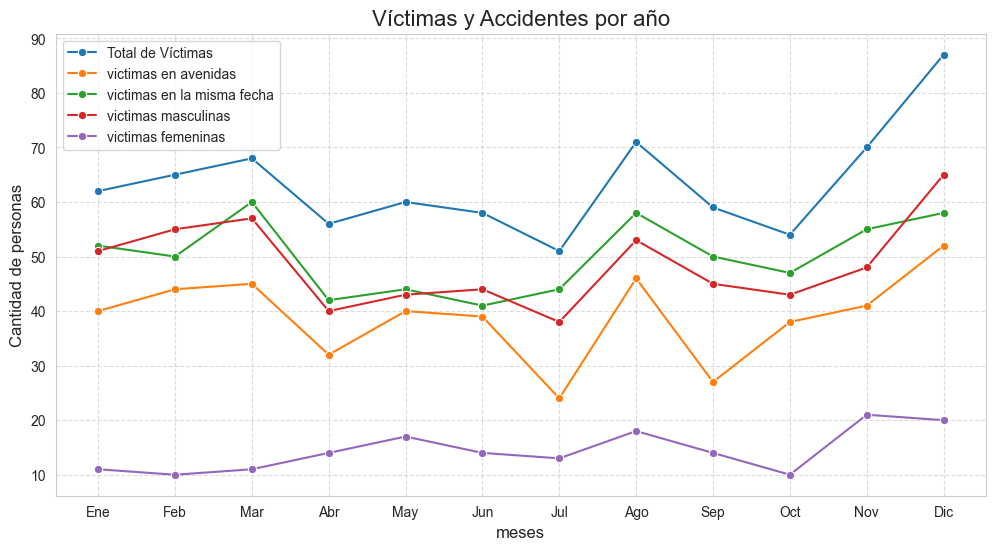

In [59]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid") 

mask_avenida = (data['tipo_de_calle'] =='AVENIDA') & (data['victimas_x'] !='SD')
mask_misma_fecha =( data['misma_fecha_accidente'] == True) & (data['sexo'] != 'SD' )
mask_masculino = data['sexo']=='MASCULINO'
mask_femenino = data['sexo']=='FEMENINO'


sns.lineplot( data[['n_victimas','mes_x']].groupby('mes_x').sum()['n_victimas'], marker='o', label='Total de Víctimas')
sns.lineplot( data[mask_avenida][['n_victimas','mes_x']].groupby('mes_x').sum()['n_victimas'], marker='o', label='victimas en avenidas')
sns.lineplot( data[mask_misma_fecha][['n_victimas','mes_x']].groupby('mes_x').sum()['n_victimas'], marker='o', label='victimas en la misma fecha')
sns.lineplot( data[mask_masculino][['n_victimas','mes_x']].groupby('mes_x').sum()['n_victimas'], marker='o', label='victimas masculinas')
sns.lineplot( data[mask_femenino][['n_victimas','mes_x']].groupby('mes_x').sum()['n_victimas'], marker='o', label='victimas femeninas')


plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.title('Víctimas y Accidentes por año', fontsize=16)
plt.xlabel('meses', fontsize=12)
plt.ylabel('Cantidad de personas', fontsize=12)

# Agregar leyenda y cuadrícula
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

**Nota:** El grafico anterior muestra la suma de victimas por cada mes durante los años 2016 y 2021. Se observa que el mes diciembre se encuentra un mayor numero de victimas respecto a los otros meses.

**Edades de victimas por año**

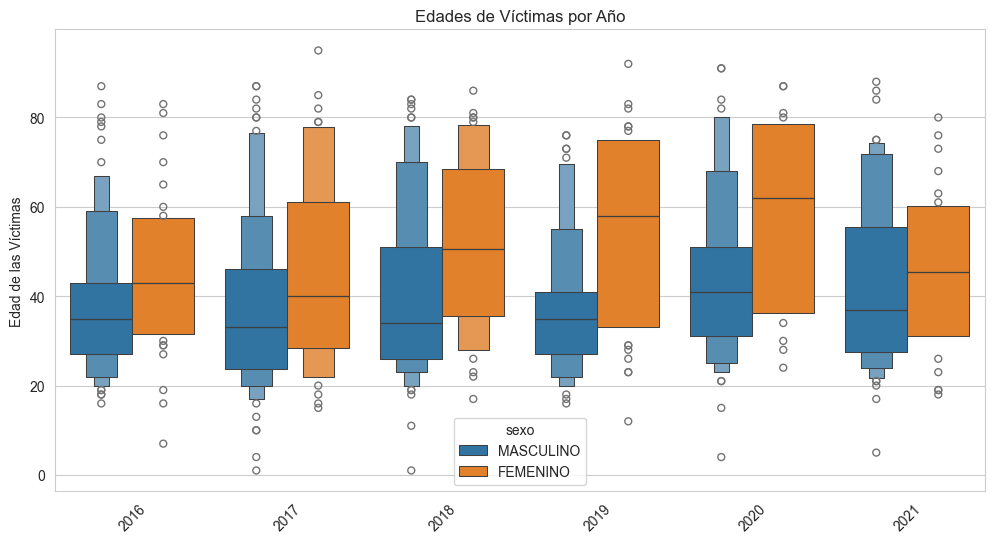

In [60]:

mask_not_sd = data['sexo']!= 'SD'

plt.figure(figsize=(12, 6))
sns.boxenplot(x='anho_x', y='edad', data=data[mask_not_sd], hue ='sexo')

plt.title('Edades de Víctimas por Año')
plt.xlabel('')
plt.ylabel('Edad de las Víctimas')

plt.xticks(rotation=45)

plt.show()

In [61]:
mask = (data['tipo_de_calle'] =='AVENIDA') & (data['rango_etario'] =='adulto')
data[mask][['anho_x','n_victimas']].groupby('anho_x').count()

,n_victimas
anho_x,
2016,40
2017,32
2018,27
2019,27
2020,22
2021,20


## Analisis de la población de caba

In [62]:
info_comuna = pd.read_csv('../data/clear/info_comuna.csv',usecols=['COMUNAS','BARRIOS','AREA'])

In [65]:
info_poblacion = pd.read_csv('../data/clear/poblacion_caba.csv',sep=';')

In [37]:
info_comuna

,COMUNAS,BARRIOS,AREA
0,2,RECOLETA,6.317265e+06
1,6,CABALLITO,6.851029e+06
2,10,FLORESTA - MONTE CASTRO - VELEZ SARSFIELD - VE...,1.265656e+07
3,11,VILLA DEL PARQUE - VILLA DEVOTO - VILLA GRAL. ...,1.412004e+07
4,12,COGHLAN - SAAVEDRA - VILLA PUEYRREDON - VILLA ...,1.557093e+07
5,14,PALERMO,1.584587e+07
6,15,AGRONOMIA - CHACARITA - PARQUE CHAS - PATERNAL...,1.432290e+07
7,13,BELGRANO - COLEGIALES - NUÑEZ,1.471321e+07
8,4,BARRACAS - BOCA - NUEVA POMPEYA - PARQUE PATRI...,2.168464e+07
9,5,ALMAGRO - BOEDO,6.660603e+06


In [88]:
info_poblacion

,comuna,2016,2017,2018,2019,2020,2021,2022
0,1,252.053,253.271,254.408,255.457,256.405,257.235,257.934
1,2,149.848,149.720,149.607,149.510,149.430,149.371,149.337
2,3,192.573,192.763,192.945,193.115,193.276,193.425,193.560
3,4,238.303,238.809,239.279,239.712,240.100,240.437,240.716
4,5,186.740,186.956,187.159,187.348,187.518,187.670,187.800
5,6,184.611,184.846,185.067,185.271,185.456,185.620,185.760
6,7,240.116,240.607,241.065,241.484,241.861,242.188,242.460
7,8,225.737,226.649,227.495,228.266,228.953,229.541,230.018
8,9,170.353,170.605,170.842,171.062,171.264,171.444,171.600
9,10,170.163,170.282,170.394,170.497,170.592,170.677,170.750


In [89]:
tabla_pivote = info_poblacion.melt(id_vars=['comuna'], var_name='anio', value_name='poblacion')

In [93]:
info_caba = tabla_pivote.merge(info_comuna,left_on='comuna', right_on='COMUNAS').drop(columns='COMUNAS')

In [122]:
info_caba['anio'] = info_caba['anio'].astype(int)

In [199]:
info_caba

,comuna,anio,poblacion,BARRIOS,AREA
0,1,2016,252.053,CONSTITUCION - MONTSERRAT - PUERTO MADERO - RE...,1.779457e+07
1,1,2017,253.271,CONSTITUCION - MONTSERRAT - PUERTO MADERO - RE...,1.779457e+07
2,1,2018,254.408,CONSTITUCION - MONTSERRAT - PUERTO MADERO - RE...,1.779457e+07
3,1,2019,255.457,CONSTITUCION - MONTSERRAT - PUERTO MADERO - RE...,1.779457e+07
4,1,2020,256.405,CONSTITUCION - MONTSERRAT - PUERTO MADERO - RE...,1.779457e+07
...,...,...,...,...,...
100,15,2018,182.427,AGRONOMIA - CHACARITA - PARQUE CHAS - PATERNAL...,1.432290e+07
101,15,2019,182.445,AGRONOMIA - CHACARITA - PARQUE CHAS - PATERNAL...,1.432290e+07
102,15,2020,182.465,AGRONOMIA - CHACARITA - PARQUE CHAS - PATERNAL...,1.432290e+07
103,15,2021,182.485,AGRONOMIA - CHACARITA - PARQUE CHAS - PATERNAL...,1.432290e+07
